# task4 基于相似度的方法

**主要内容**

基于距离的度量

基于密度的度量

## 4.1 概述
   “异常”通常是一个主观的判断，什么样的数据被认为是“异常”的，需要结合业务背景和环境来具体分析确定。   实际上，数据通常嵌入在大量的噪声中，而我们所说的“异常值”通常指具有特定业务意义的那一类特殊的异常值。噪声可以视作特性较弱的异常值，没有被分析的价值。噪声和异常之间、正常数据和噪声之间的边界都是模糊的。异常值通常具有更高的离群程度分数值，同时也更具有可解释性。
  在普通的数据处理中，我们常常需要保留正常数据，而对噪声和异常值的特性则基本忽略。但在异常检测中，我们弱化了“噪声”和“正常数据”之间的区别，专注于那些具有有价值特性的异常值。在基于相似度的方法中，主要思想是异常点的表示与正常点不同

## 4.2基于距离的度量
基于距离的方法是一种常见的适用于各种数据域的异常检测算法，它基于最近邻距离来定义异常值。 此类方法不仅适用于多维数值数据，在其他许多领域，例如分类数据，文本数据，时间序列数据和序列数据等方面也有广泛的应用。

基于距离的异常检测有这样一个前提假设，即异常点的 $k$ 近邻距离要远大于正常点。解决问题的最简单方法是使用嵌套循环。 第一层循环遍历每个数据，第二层循环进行异常判断，需要计算当前点与其他点的距离，一旦已识别出多于 $k$ 个数据点与当前点的距离在 $D$ 之内，则将该点自动标记为非异常值。 这样计算的时间复杂度为$O(N^{2})$，当数据量比较大时，这样计算是及不划算的。 因此，需要修剪方法以加快距离计算。

### 4.2.1 基于单元的方法
在基于单元格的技术中，数据空间被划分为单元格，单元格的宽度是阈值D和数据维数的函数。具体地说，每个维度被划分成宽度最多为 $\frac{D}{{2 \cdot \sqrt d }}$ 单元格。在给定的单元以及相邻的单元中存在的数据点满足某些特性，这些特性可以让数据被更有效的处理。

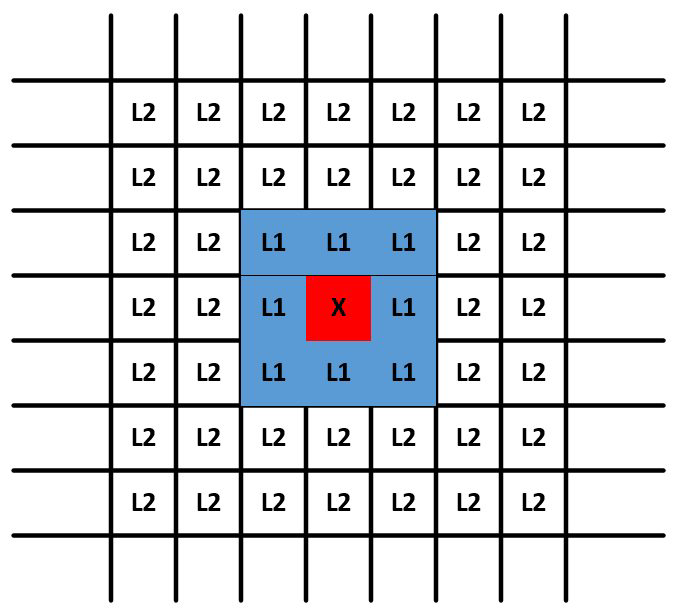
以二维情况为例，此时网格间的距离为 $\frac{D}{{2 \cdot \sqrt d }}$ ，需要记住的一点是，网格单元的数量基于数据空间的分区，并且与数据点的数量无关。这是决定该方法在低维数据上的效率的重要因素，在这种情况下，网格单元的数量可能不多。 另一方面，此方法不适用于更高维度的数据。对于给定的单元格，其 $L_{1}$ 邻居被定义为通过最多1个单元间的边界可从该单元到达的单元格的集合。请注意，在一个角上接触的两个单元格也是 $L_{1}$ 邻居。 $L_{2}$ 邻居是通过跨越2个或3个边界而获得的那些单元格。 上图中显示了标记为 $X$的特定单元格及其 $L_{1}$ 和 $L_{2}$ 邻居集。 显然，内部单元具有8个 $L_{1}$ 邻居和40个 $L_{2}$ 邻居。 然后，可以立即观察到以下性质：

单元格中两点之间的距离最多为 $D/2$。
一个点与 $L_{1}$ 邻接点之间的距离最大为 $D$。
一个点与它的 $Lr$ 邻居(其中$r$ > 2)中的一个点之间的距离至少为$D$。
  唯一无法直接得出结论的是 $L_{2}$ 中的单元格。 这表示特定单元中数据点的不确定性区域。 对于这些情况，需要明确执行距离计算。 同时，可以定义许多规则，以便立即将部分数据点确定为异常值或非异常值。 规则如下：

如果一个单元格中包含超过 $k$ 个数据点及其 $L_{1}$ 邻居，那么这些数据点都不是异常值。
如果单元 $A$ 及其相邻 $L_{1}$ 和 $L_{2}$ 中包含少于 $k$ 个数据点，则单元A中的所有点都是异常值。
  此过程的第一步是将部分数据点直接标记为非异常值（如果由于第一个规则而导致它们的单元格包含 $k$ 个点以上）。 此外，此类单元格的所有相邻单元格仅包含非异常值。 为了充分利用第一条规则的修剪能力，确定每个单元格及其 $L_{1}$ 邻居中点的总和。 如果总数大于 $k$ ，则所有这些点也都标记为非离群值。

  接下来，利用第二条规则的修剪能力。 对于包含至少一个数据点的每个单元格 $A$，计算其中的点数及其 $L_{1}$ 和 $L_{2}$ 邻居的总和。 如果该数字不超过 $k$，则将单元格$A$ 中的所有点标记为离群值。 此时，许多单元可能被标记为异常值或非异常值。

  对于此时仍未标记为异常值或非异常值的单元格中的数据点需要明确计算其 $k$ 最近邻距离。即使对于这样的数据点，通过使用单元格结构也可以更快地计算出 $k$ 个最近邻的距离。考虑到目前为止尚未被标记为异常值或非异常值的单元格$A$。这样的单元可能同时包含异常值和非异常值。单元格 $A$ 中数据点的不确定性主要存在于该单元格的 $L_{2}$ 邻居中的点集。无法通过规则知道 $A$ 的 $L_{2}$ 邻居中的点是否在阈值距离 $D$ 内，为了确定单元 $A$ 中数据点与其$L_{2}$ 邻居中的点集在阈值距离 $D$ 内的点数，需要进行显式距离计算。对于那些在 $L_{1}$ 和 $L_{2}$ 中不超过 $k$ 个且距离小于 $D$ 的数据点，则声明为异常值。需要注意，仅需要对单元 $A$ 中的点到单元$A$的$L_{2}$邻居中的点执行显式距离计算。这是因为已知 $L_{1}$ 邻居中的所有点到 $A$ 中任何点的距离都小于 $D$，并且已知 $Lr$ 中 $(r> 2)$ 的所有点与 $A$上任何点的距离至少为 $D$。因此，可以在距离计算中实现额外的节省。

### 4.2.2 基于索引的方法
对于一个给定数据集，基于索引的方法利用多维索引结构(如 $\mathrm{R}$ 树、$k-d$ 树)来搜索每个数据对象 $A$ 在半径 $D$ 范围 内的相邻点。设 $M$ 是一个异常值在其 $D$ -邻域内允许含有对象的最多个数，若发现某个数据对象 $A$ 的 $D$ -邻域内出现 $M+1$ 甚至更多个相邻点， 则判定对象 $A$ 不是异常值。该算法时间复杂度在最坏情况下为 $O\left(k N^{2}\right),$ 其中 $k$ 是数据集维数， $N$ 是数据集包含对象的个数。该算法在数据集的维数增加时具有较好的扩展性，但是时间复杂度的估算仅考虑了搜索时间，而构造索引的任务本身就需要密集复杂的计算量。

## 4.3基于密度的度量

基于密度的算法主要有局部离群因子(LocalOutlierFactor,LOF)，以及LOCI、CLOF等基于LOF的改进算法。下面我们以LOF为例来进行详细的介绍和实践。

  基于距离的检测适用于各个集群的密度较为均匀的情况。在下图中，离群点B容易被检出，而若要检测出较为接近集群的离群点A，则可能会将一些集群边缘的点当作离群点丢弃。而LOF等基于密度的算法则可以较好地适应密度不同的集群情况。

那么，这个基于密度的度量值是怎么得来的呢？还是要从距离的计算开始。类似k近邻的思路，首先我们也需要来定义一个“k-距离”。

### 4.3.1 k-距离（k-distance(p)）：

对于数据集$D$中的给定对象$p$，对象$p$与数据集$D$中任意点$o$的距离为$d(p,o)$。我们把数据集$D$中与对象$p$距离最近的$k$个相邻点的最远距离表示为$k-distance(p)$，把距离对象$p$距离第$k$近的点表示为$o_k$，那么给定对象$p$和点$o_k$之间的距离$d(p,o_k)=k − d i s t a n c e ( p )$，满足：

在集合$D$中至少有不包括$p$在内的$k$个点 $o'$，其中$o'∈D{p}$，满足$d(p,o')≤d(p,o_k)$
在集合$D$中最多有不包括$p$在内的$k-1$个点$o'$，其中$o'∈D{p}$，满足$d(p,o')<d(p,o_k)$
  直观一些理解，就是以对象$p$为中心，对数据集$D$中的所有点到$p$的距离进行排序，距离对象$p$第$k$近的点$o_k$与$p$之间的距离就是k-距离。

### 4.3.2 k-邻域（k-distance neighborhood）：

由k-距离，我们扩展到一个点的集合——到对象$p$的距离小于等于k-距离的所有点的集合，我们称之为k-邻域：$N_{k − d i s t a n c e ( p )}( p ) = { q ∈ D \backslash{ p } ∣ d ( p , q ) ≤ k − d i s t a n c e ( p )} $。

k-邻域包含对象$p$的第$k$距离以内的所有点，包括第$k$距离点。

对象$p$的第$k$邻域点的个数$ ∣ N_k(p)∣ ≥ k$。

  在二维平面上展示出来的话，对象$p$的k-邻域实际上就是以对象$p$为圆心、k-距离为半径围成的圆形区域。就是说，k-邻域已经从“距离”这个概念延伸到“空间”了。

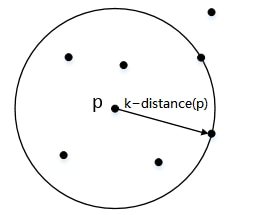

### 4.3.3 可达距离（reachability distance）：

有了邻域的概念，我们可以按照到对象$o$的距离远近，将数据集$D$内的点按照到$o$的距离分为两类：

若$p_i$在对象$o$的k-邻域内，则可达距离就是给定点$p_i$关于对象o的k-距离；
若$p_i$在对象$o$的k-邻域外，则可达距离就是给定点$p_i$关于对象o的实际距离。
  给定点$p_i$关于对象$o$的可达距离用数学公式可以表示为：

  $$r e a c h−d i s t_ k ( p , o ) = m a x {k−distance( o ) , d ( p , o )}$$ 
  这样的分类处理可以简化后续的计算，同时让得到的数值区分度更高。

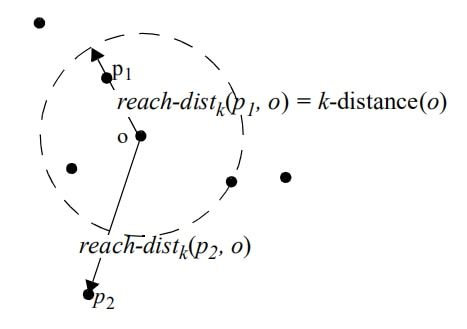

如图：

$p_1$在对象$o$的k-邻域内，$d ( p_1 , o )<k−distance( o )$，

可达距离$r e a c h−d i s t_ k ( p_1 , o ) = k−distance( o )$ ;

$p_2$在对象$o$的k-邻域外，$d ( p_2 , o )>k−distance( o )$，

可达距离$r e a c h−d i s t_ k ( p_2 , o ) = d ( p_2 , o )$ ;

  注意：这里用的是$p_k$与$o$的距离$d(p_k,o)$与$o$的k-距离$k−distance( o )$来进行比较，不是与$k−distance( p )$进行比较！

  可达距离的设计是为了减少距离的计算开销，$o$的k-邻域内的所有对象$p$的k-距离计算量可以被显著降低，相当于使用一个阈值把需要计算的部分“截断”了。这种“截断”对计算量的降低效果可以通过参数$k$来控制，$k$的值越高，无需计算的邻近点越多，计算开销越小。但是另一方面，$k$的值变高，可能意味着可达距离变远，对集群点和离群点的区分度可能变低。因此，如何选择$k$值，是LOF算法能否达到效率与效果平衡的重要因素。

### 4.3.4 局部可达密度（local reachability density）

我们可以将“密度”直观地理解为点的聚集程度，就是说，点与点之间距离越短，则密度越大。在这里，我们使用数据集$D$中对象$p$与对象$o$的k-邻域内所有点的可达距离平均值的倒数（注意，不是导数）来定义局部可达密度。

  在进行局部可达密度的计算的时候，我们需要避免数据集内所有数据落在同一点上，即所有可达距离之和为0的情况：此时局部密度为∞，后续计算将无法进行。LOF算法中针对这一问题进行了如下的定义：对于数据集$D$内的给定对象$p$，存在至少$MinPts(p)\geq1$个不同于$p$的点。因此，我们使用对象$p$到$o∈N_{MinPts}(p)$的可达距离$reach-dist_{MinPts}(p, o)$作为度量对象$p$邻域的密度的值。

  给定点p的局部可达密度计算公式为：$$lrd_{MinPts}(p)=1/(\frac {\sum\limits_{o∈N_{MinPts}(p)} reach-dist_{MinPts}(p,o)} {\left\vert N_{MinPts}(p) \right\vert})$$

  由公式可以看出，这里是对给定点p进行度量，计算其邻域内的所有对象o到给定点p的可达距离平均值。给定点p的局部可达密度越高，越可能与其邻域内的点 属于同一簇；密度越低，越可能是离群点。

### 4.3.5 局部异常因子：

得到lrd（局部可达密度）以后就可以将每个点的lrd将与它们的k个邻点的lrd进行比较，得到局部异常因子LOF。更具体地说，LOF在数学上是对象$p$的邻居点$o$（$o∈N_{MinPts}(p)$）的lrd平均值与$p$的lrd的比值。

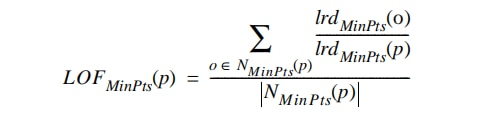

  不难看出，$p$的局部可达密度越低，且它的$MinPts$近邻的平均局部可达密度越高，则$p$的LOF值越高。

  如果这个比值越接近1，说明o的邻域点密度差不多，o可能和邻域同属一簇；如果这个比值小于1，说明o的密度高于其邻域点密度，o为密集点；如果这个比值大于1，说明o的密度小于其邻域点密度，o可能是异常点。

  由公式计算出的LOF数值，就是我们所需要的离群点分数。

## 4.4 LOF实操

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pyod.models.pca import PCA
import numpy as np
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

In [14]:
data = pd.read_csv('D:\\脱硝\\guiyi_nmidata.csv', sep=',')
xtrain=data.iloc[:100,12].values.reshape(-1,1)

In [15]:
from sklearn.neighbors import LocalOutlierFactor

In [16]:
def lof(data, predict=None, k=5, method=1, plot=False):   
    # 判断是否传入测试数据，若没有传入则测试数据赋值为训练数据
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    # 计算 LOF 离群因子
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    # 根据阈值划分离群点与正常点
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

In [17]:
loftrain=lof(xtrain)

In [20]:
loftrain[1]

,0,k distances,local outlier factor
49,243.38699,0.22400,-0.627073
48,243.38699,0.22400,-0.627073
68,243.61099,0.22400,-0.627073
69,243.61099,0.22400,-0.627073
70,243.41801,0.19298,-0.627073
...,...,...,...
25,231.56900,2.52000,0.114378
13,250.98099,3.35100,0.206581
12,250.98099,3.35100,0.206581
3,262.01299,7.99398,0.564489


In [22]:
loftrain[0]

,0,k distances,local outlier factor
